In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('tennis.csv')

In [3]:
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()

In [8]:
df['outlook'] = le.fit_transform(df['outlook'])
df['temp'] = le.fit_transform(df['temp'])
df['humidity'] = le.fit_transform(df['humidity'])
df['windy'] = le.fit_transform(df['windy'])
df['play'] = le.fit_transform(df['play'])

In [9]:
df

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [17]:
x = df[['outlook','temp','humidity','windy']]

In [18]:
x

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [19]:
y = df['play']

In [20]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

In [21]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [25]:
x_train

,outlook,temp,humidity,windy
1,2,1,0,1
0,2,1,0,0
9,1,2,1,0
6,0,0,1,1
8,2,0,1,0
13,1,2,0,1
11,0,2,0,1
4,1,0,1,0
2,0,1,0,0
12,0,1,1,0


In [26]:
x_test

,outlook,temp,humidity,windy
7,2,2,0,0
10,2,2,1,1
5,1,0,1,1


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
# dtr = DecisionTreeClassifier(criterion='gini')
dtr = DecisionTreeClassifier(criterion='entropy')

In [36]:
dtr.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [37]:
dtr.predict(x_test)

array([0, 1, 1])

In [38]:
dtr.score(x_test,y_test)

0.6666666666666666

In [39]:
from sklearn import tree

[Text(0.6, 0.9, 'x[2] <= 0.5\nentropy = 0.845\nsamples = 11\nvalue = [3, 8]'),
 Text(0.4, 0.7, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.5, 'x[0] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4, 0.3, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.7, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]')]

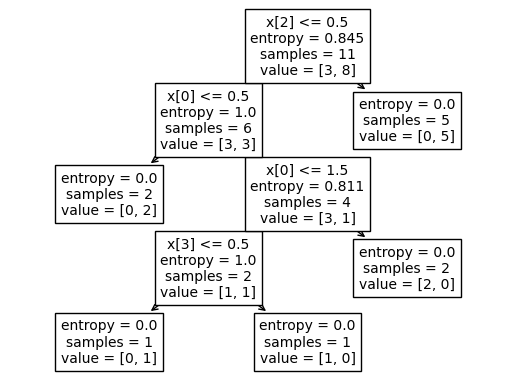

In [40]:
tree.plot_tree(dtr)